<a href="https://colab.research.google.com/github/SrinithiBala2021/DATA-STORY-2/blob/main/Project113_DATA_STORY_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving savings_data.csv to savings_data.csv


In [ ]:
import pandas as pd
df = pd.read_csv("savings_data.csv")

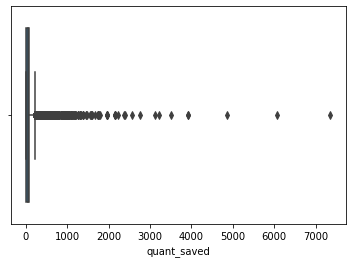

In [ ]:
import seaborn as sns
sns.boxplot(data=df,x=df["quant_saved"])

In [ ]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1

print(f"Q1 -{q1}")
print(f"Q3 -{q3}")
print(f"IQR -{iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

new_df = df[df["quant_saved"] < upper_whisker]

Q1 -2.284
Q3 -86.514
IQR -84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


In [ ]:
import statistics
import plotly.figure_factory as ff

all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.20051938981879
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.86687191728863


In [ ]:
import random
import plotly.graph_objects as go

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

In [ ]:
import numpy as np
print(f"Standard deviation of the sampling data - {statistics.stdev(sampling_mean_list)}")
print(f"Mean of Population - {statistics.mean(all_savings)}")
print(f"Mean of Sampling Distribution - {mean_sampling}")

temp_df = new_df[new_df.female != 0]

female = temp_df["female"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(female, savings)
print(f"Correlation between the gender of the person and their savings is - {correlation[0,1]}")

Standard deviation of the sampling data - 5.090539004798456
Mean of Population - 46.20051938981879
Mean of Sampling Distribution - 46.26718248222612
Correlation between the gender of the person and their savings is - nan


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
reminded_df = new_df.loc[new_df["female"] == 1]
not_reminded_df = new_df.loc[new_df["female"] == 0]

print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  wealthy
0      13.0908       1                     0        0
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1
    quant_saved  female  highschool_completed  wealthy
1     39.272400       0                     1        1
8      2.284000       0                     1        1
10    58.908600       0                     1        1
17     2.284000       0                     1        1
28    47.178078       0                     0        0


In [ ]:
not_reminded_savings = not_reminded_df["quant_saved"].tolist()

sampling_mean_list_not_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))

mean_sampling_not_reminded = statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded = statistics.stdev(sampling_mean_list_not_reminded)

print(f"Mean of Sampling (Not Reminded) -> {mean_sampling_not_reminded}")
print(f"Standard Deviation of Sampling (Not Reminded) -> {stdev_sampling_not_reminded}")
fig = ff.create_distplot([sampling_mean_list_not_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Not Reminded) -> 47.30195400043793
Standard Deviation of Sampling (Not Reminded) -> 5.102119142537592


In [ ]:
first_std_deviation_start = mean_sampling_not_reminded-stdev_sampling_not_reminded
first_std_deviation_end = mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"First (start) - {first_std_deviation_start} and First (end) - {first_std_deviation_end}")

second_std_deviation_start = mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_std_deviation_end = mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"Second (start) - {second_std_deviation_start} and Second (end) - {second_std_deviation_end}")

third_std_deviation_start = mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_std_deviation_end = mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"Third (start) - {third_std_deviation_start} and Third (end) - {third_std_deviation_end}")

First (start) - 42.19983485790034 and First (end) - 52.40407314297552
Second (start) - 37.097715715362746 and Second (end) - 57.506192285513116
Third (start) - 31.995596572825157 and Third (end) - 62.608311428050705


In [ ]:
reminded_savings = reminded_df["quant_saved"].tolist()

sampling_mean_list_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded = statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded = statistics.stdev(sampling_mean_list_reminded)

print(f"Mean of Sampling (Reminded) -> {mean_sampling_reminded}")
print(f"Standard Deviation of Sampling (Reminded) -> {stdev_sampling_reminded}")
fig = ff.create_distplot([sampling_mean_list_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()


Mean of Sampling (Reminded) -> 45.46486073385755
Standard Deviation of Sampling (Reminded) -> 4.920833917516055


In [ ]:
z_score = (mean_sampling_reminded - mean_sampling_not_reminded) / stdev_sampling_not_reminded
print(f"Z-Score is - {z_score}")

Z-Score is - -0.36006475255822523
